In [1]:
import numpy as np
import matplotlib.pyplot as plt
def generate_linear(n=100):
    pts=np.random.uniform(0,1,(n,2))
    inputs=[]
    labels=[]
    for pt in pts :
        inputs.append([pt[0],pt[1]])
        #distance=(pt[0]*pt[1])/1.414
        if (pt[0]>pt[1]):
            labels.append(0)
        else:
            labels.append(1)
    return np.array(inputs),np.array(labels).reshape(n,1)
def generate_xor_easy():
    inputs=[]
    labels=[]
    for i in range (11):
        inputs.append([0.1*i,0.1*i])
        labels.append(0)
        if 0.1*i ==0.5:
            continue
        inputs.append([0.1*i,1-0.1*i])
        labels.append(1)
    return np.array(inputs),np.array(labels).reshape(21,1)
def show_result(x,y,pred_y):
    plt.subplot(1,2,1)
    plt.title('Ground truth',fontsize=18)
    for i in range(x.shape[0]):
        if y[i]==0:
            plt.plot(x[i][0],x[i][1],'ro')
        else :
            plt.plot(x[i][0],x[i][1],'bo')
    plt.subplot(1,2,2)
    plt.title('predict result',fontsize=18)
    for i in range(x.shape[0]):
        if pred_y[i]==0:
            plt.plot(x[i][0],x[i][1],'ro')
        else :
            plt.plot(x[i][0],x[i][1],'bo')
    plt.show()
def sigmoid(s, deriv=False):
    if (deriv == True):
        return s * (1 - s)
    return 1/(1 + np.exp(-s))
x1,y1=generate_linear()
x2,y2=generate_xor_easy()



創建類神經網路

In [2]:
class NeuralNetwork(object):
    def __init__(self,inputlayer=2,hiddenlayer1=2,hiddenlayer2=2,outputlayer=1,lr=0.01):
        #parameter
        self.inputlayer=inputlayer
        self.hiddenlayer1=hiddenlayer1
        self.hiddenlayer2=hiddenlayer2
        self.outputlayer=1
        #weight
        self.w1=np.random.normal(size=(self.inputlayer,self.hiddenlayer1))#(2*2)
        self.w2=np.random.normal(size=(self.hiddenlayer1,self.hiddenlayer2))#(2*2)
        self.w3=np.random.normal(size=(self.hiddenlayer2,self.outputlayer))#(2*1)
        self.lr=lr
    def forward(self,x):
        self.z=np.dot(x,self.w1)#(100,2)dot(2,2)=100,2
        self.a=self.sigmoid(self.z) #through activation funtion
        self.z2=np.dot(self.a,self.w2)#(100,2)dot(2,2)=100,2
        self.a2=self.sigmoid(self.z2)
        self.z3=np.dot(self.a2,self.w3)#100,2dot(2,1)=100,1個output
        output=self.sigmoid(self.z3)
        return output
    def backward(self,x,y,output):#backward propagate through the network
        self.output_error=-2*(y-output)#error in output derivative(yt-y)^2-> -2(yt-y)
        self.output_delta=self.output_error*self.sigmoid(output,derive=True)

        self.z3_error=self.output_delta.dot(self.w3.T)
        self.z3_delta=self.z3_error*self.sigmoid(self.a2,derive=True)
        
        self.z2_error=self.z3_error.dot(self.w2.T)
        self.z2_delta=self.z2_error*self.sigmoid(self.a,derive=True)
        #更新網路參數
        self.w1-=x.T.dot(self.z2_delta)*self.lr
        self.w2-=self.a.T.dot(self.z3_delta)*self.lr
        self.w3-=self.a2.T.dot(self.output_delta)*self.lr

   

    def train(self,x,y):
        output=self.forward(x)
        self.backward(x,y,output)

    def sigmoid(self,s,derive=False):
        if (derive==True):
            return s*(1-s)
        return 1/(1+np.exp(-s))
    def getweight(self):
        return self.w1,self.w2,self.w3


epoch: 0 loss:0.242360
epoch: 5000 loss:0.001391
epoch: 10000 loss:0.000498
epoch: 15000 loss:0.000274
epoch: 20000 loss:0.000181
epoch: 25000 loss:0.000131
epoch: 30000 loss:0.000102
epoch: 35000 loss:0.000082
epoch: 40000 loss:0.000068
epoch: 45000 loss:0.000058
epoch: 50000 loss:0.000050


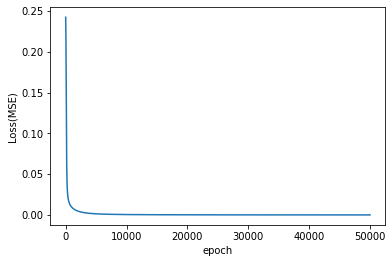

In [8]:

model=NeuralNetwork(hiddenlayer1=2,hiddenlayer2=2,lr=0.01)

def train_and_plot_loss(epochs,model,x,y): #設定訓練過程
    error_list=[]
    for i in range(epochs):
        model.train(x,y)
        error_list.append(np.mean(np.square(y-model.forward(x))))
        if (i%5000==0):
            print('epoch:',i,'loss:%6f'%(np.mean(np.square(y-model.forward(x)))))
    fig, ax = plt.subplots()
    ax.plot(np.arange((len(error_list))),error_list)
    plt.xlabel('epoch')
    plt.ylabel('Loss(MSE)')
    plt.show()

train_and_plot_loss(50001,model,x1,y1)


準確率 100.0 %


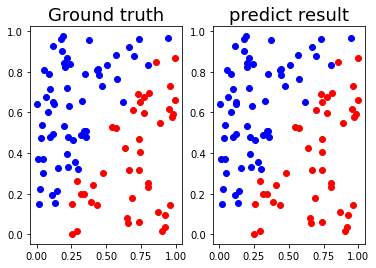

In [10]:

def classify(x,yin,model): #創建分類函式
    w1,w2,w3=model.getweight()
    ylabel=[]
    z=np.dot(x,w1)#2dot(2,3)=3
    a=sigmoid(z) #through activation funtion
    z2=np.dot(a,w2)#3dot(3,2)=2
    a2=sigmoid(z2)
    z3=np.dot(a2,w3)#2dot(2,1)=1個output
    output=sigmoid(z3)
    for i in range (x.shape[0]):
        if output[i]>0.5:
            ylabel.append(1)
        else :
            ylabel.append(0)
    ylabel=np.array(ylabel)
    ylabel=(ylabel.reshape((x.shape[0],1)))
    acc =len(ylabel[ylabel==yin])
    print('準確率',acc/(x.shape[0])*100,'%')
    return ylabel
y_pred1=classify(x1,y1,model) 
show_result(x1,y1,y_pred1)      


epoch: 0 loss:0.345757
epoch: 5000 loss:0.024561
epoch: 10000 loss:0.002158
epoch: 15000 loss:0.000835
epoch: 20000 loss:0.000482
epoch: 25000 loss:0.000329
epoch: 30000 loss:0.000246
epoch: 35000 loss:0.000195
epoch: 40000 loss:0.000160
epoch: 45000 loss:0.000136
epoch: 50000 loss:0.000117


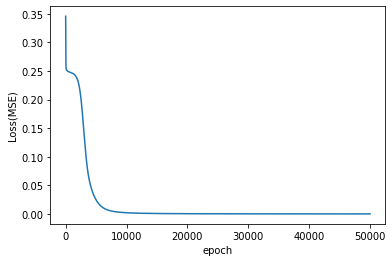

In [16]:
modelx=NeuralNetwork(hiddenlayer1=4,hiddenlayer2=4,lr=0.01)
train_and_plot_loss(50001,modelx,x2,y2)


準確率 100.0 %


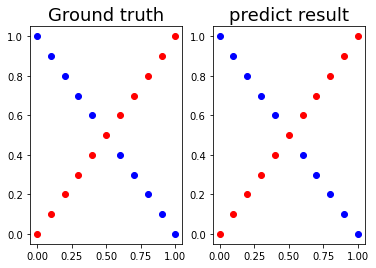

In [17]:
y_pred2=classify(x2,y2,modelx)
show_result(x2,y2,y_pred2)


創建沒有activation 之neuralnetwork

In [18]:
class noactivenet(object):
    def __init__(self,inputlayer=2,hiddenlayer1=2,hiddenlayer2=2,outputlayer=1,lr=0.01):
        #parameter
        self.inputlayer=inputlayer
        self.hiddenlayer1=hiddenlayer1
        self.hiddenlayer2=hiddenlayer2
        self.outputlayer=1
        #weight
        self.w1=np.random.normal(size=(self.inputlayer,self.hiddenlayer1))#(2*2)
        self.w2=np.random.normal(size=(self.hiddenlayer1,self.hiddenlayer2))#(2*2)
        self.w3=np.random.normal(size=(self.hiddenlayer2,self.outputlayer))#(2*1)
        self.lr=lr
    def forward(self,x):
        self.z=np.dot(x,self.w1)#(100,2)dot(2,2)=100,2
        #self.a=self.sigmoid(self.z) #through activation funtion
        self.z2=np.dot(self.z,self.w2)#(100,2)dot(2,2)=100,2
        #self.a2=self.sigmoid(self.z2)
        self.z3=np.dot(self.z2,self.w3)#100,2dot(2,1)=100,1個output
        #output=self.sigmoid(self.z3)
        output=self.z3
        return output
    def backward(self,x,y,output):#backward propagate through the network
        self.output_error=-2*(y-output)#error in output derivative(yt-y)^2-> -2(yt-y)
        #self.output_delta=self.output_error*self.sigmoid(output,derive=True)

        self.z3_error=self.output_error.dot(self.w3.T)
        #self.z3_delta=self.z3_error*self.sigmoid(self.a2,derive=True)
        
        self.z2_error=self.z3_error.dot(self.w2.T)
        #self.z2_delta=self.z2_error*self.sigmoid(self.a,derive=True)

        self.w1-=x.T.dot(self.z2_error)*self.lr
        self.w2-=self.z.T.dot(self.z3_error)*self.lr
        self.w3-=self.z3.T.dot(self.output_error)*self.lr
    def train(self,x,y):
        output=self.forward(x)
        self.backward(x,y,output)

    def sigmoid(self,s,derive=False):
        if (derive==True):
            return s*(1-s)
        return 1/(1+np.exp(-s))
    def getweight(self):
        return self.w1,self.w2,self.w3

epoch: 0 loss:0.246115
epoch: 5000 loss:0.021706
epoch: 10000 loss:0.010518
epoch: 15000 loss:0.006984
epoch: 20000 loss:0.005043
epoch: 25000 loss:0.003813
epoch: 30000 loss:0.002986
epoch: 35000 loss:0.002405
epoch: 40000 loss:0.001983
epoch: 45000 loss:0.001668


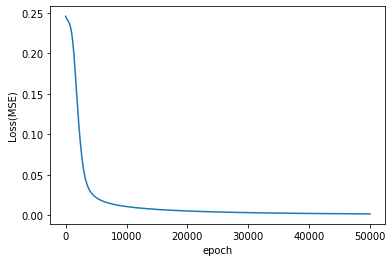

In [21]:
noactivenet=NeuralNetwork(hiddenlayer1=2,hiddenlayer2=2,lr=0.001)

train_and_plot_loss(50000,noactivenet,x1,y1)

準確率 100.0 %


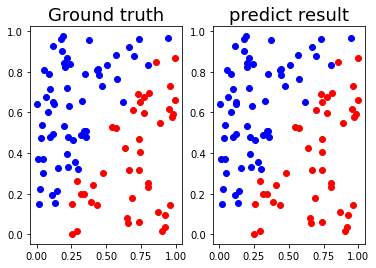

In [23]:
yprednon=classify(x1,y1,noactivenet)
show_result(x1,y1,yprednon)

創建不同activate function 之網路(以tanh為例)

In [31]:
class tanhnet(object):
    def __init__(self,inputlayer=2,hiddenlayer1=2,hiddenlayer2=2,outputlayer=1,lr=0.01):
        #parameter
        self.inputlayer=inputlayer
        self.hiddenlayer1=hiddenlayer1
        self.hiddenlayer2=hiddenlayer2
        self.outputlayer=1
        #weight
        self.w1=np.random.normal(size=(self.inputlayer,self.hiddenlayer1))#(2*2)
        self.w2=np.random.normal(size=(self.hiddenlayer1,self.hiddenlayer2))#(2*2)
        self.w3=np.random.normal(size=(self.hiddenlayer2,self.outputlayer))#(2*1)
        self.lr=lr
    def forward(self,x):
        self.z=np.dot(x,self.w1)#(100,2)dot(2,2)=100,2
        self.a=self.tanh(self.z) #through activation funtion
        self.z2=np.dot(self.a,self.w2)#(100,2)dot(2,2)=100,2
        self.a2=self.tanh(self.z2)
        self.z3=np.dot(self.a2,self.w3)#100,2dot(2,1)=100,1個output
        output=self.tanh(self.z3)
        return output
    def backward(self,x,y,output):#backward propagate through the network
        self.output_error=-2*(y-output)#error in output derivative(yt-y)^2-> -2(yt-y)
        self.output_delta=self.output_error*self.tanh(output,derive=True)

        self.z3_error=self.output_delta.dot(self.w3.T)
        self.z3_delta=self.z3_error*self.tanh(self.a2,derive=True)
        
        self.z2_error=self.z3_error.dot(self.w2.T)
        self.z2_delta=self.z2_error*self.tanh(self.a,derive=True)

        self.w1-=x.T.dot(self.z2_delta)*self.lr
        self.w2-=self.a.T.dot(self.z3_delta)*self.lr
        self.w3-=self.a2.T.dot(self.output_delta)*self.lr

   

    def train(self,x,y):
        output=self.forward(x)
        self.backward(x,y,output)
    def tanh(self,x,derive=False):
        if (derive==True):
            return 1.0 - x**2
        else:
            return np.tanh(x)

    def sigmoid(self,s,derive=False):
        if (derive==True):
            return s*(1-s)
        return 1/(1+np.exp(-s))
    def getweight(self):
        return self.w1,self.w2,self.w3


epoch: 0 loss:0.281527
epoch: 5000 loss:0.004032
epoch: 10000 loss:0.003336
epoch: 15000 loss:0.002818
epoch: 20000 loss:0.002276
epoch: 25000 loss:0.001741
epoch: 30000 loss:0.001384
epoch: 35000 loss:0.001141
epoch: 40000 loss:0.000968
epoch: 45000 loss:0.000839


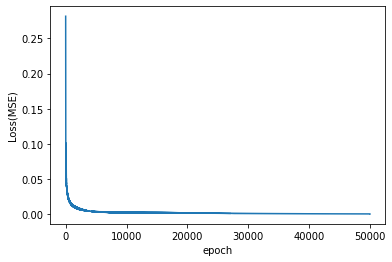

In [32]:
tanhnet=tanhnet(hiddenlayer1=2,hiddenlayer2=2,lr=0.01)

train_and_plot_loss(50000,tanhnet,x1,y1)